In [27]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [28]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('AMZN.csv')
df = df[['Open']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [29]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Open'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4919.610, Time=1.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4928.390, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4924.412, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4923.739, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4929.853, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4923.130, Time=0.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4923.124, Time=0.72 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4920.514, Time=2.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4920.515, Time=6.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4921.172, Time=2.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4919.103, Time=3.03 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4922.154, Time=0.74 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=4920.586, Time=4.85 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4922.787, Time=1.26 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept

ARIMA(order=(1, 1, 3), scoring_args={}, suppress_warnings=True)

In [31]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Open'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Open'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [32]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[172.1562814  172.30652266 172.34460457 172.54022969 172.58592584
 172.77430473 172.82689689 173.00871307 173.06755076 173.24342325
 173.30791737 173.47840682 173.5480238  173.71363798 173.78789461
 173.94909338 174.02755202 174.18475187 174.26701616 174.42059429
 174.50630525 174.65660329 174.74543582 174.89276316 174.9844228
 175.12905967 175.22327976 175.36547993 175.46201894 175.60201226]


In [33]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 82.38307543337888
Testing RMSE: 53.627931511279535


Validation RMSE: 82.38307543337888
Testing RMSE: 53.627931511279535


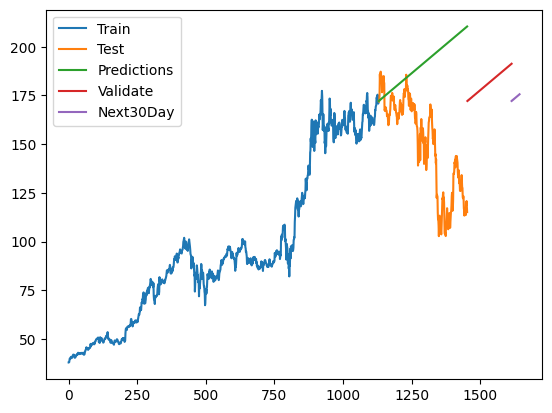

In [34]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Open'])
plt.plot(test_data.index, test_data['Open'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [35]:
test_data.index

RangeIndex(start=1130, stop=1453, step=1)